In [42]:
!pip install kagglehub
!pip install opencv-python

In [43]:
import kagglehub
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random


In [44]:
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print(os.listdir(dataset))

['animals', 'images']


In [45]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [46]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [47]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [48]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

In [49]:
train_data = [] #A list for store processed img


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

The program handles training data by organizing images from different categories like 'cats', 'dogs', and 'pandas'. It starts by creating an empty list called train_data to store both the processed images and their labels. For each category, it locates the folder path, collects all image filenames inside, and shuffles them to introduce randomness. From the shuffled list, it selects the first 100 images.
Each selected image is then read, converted to grayscale to remove color, and resized to 100x100 pixels. After processing, the image is paired with a label based on its category and added to the train_data list. As a result, a total of 300 images (100 from each category) are prepared for training the model.

In [51]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[2, 1, 2, 0, 1, 0, 1, 0, 2, 0]


the code shuffles the `train_data` list

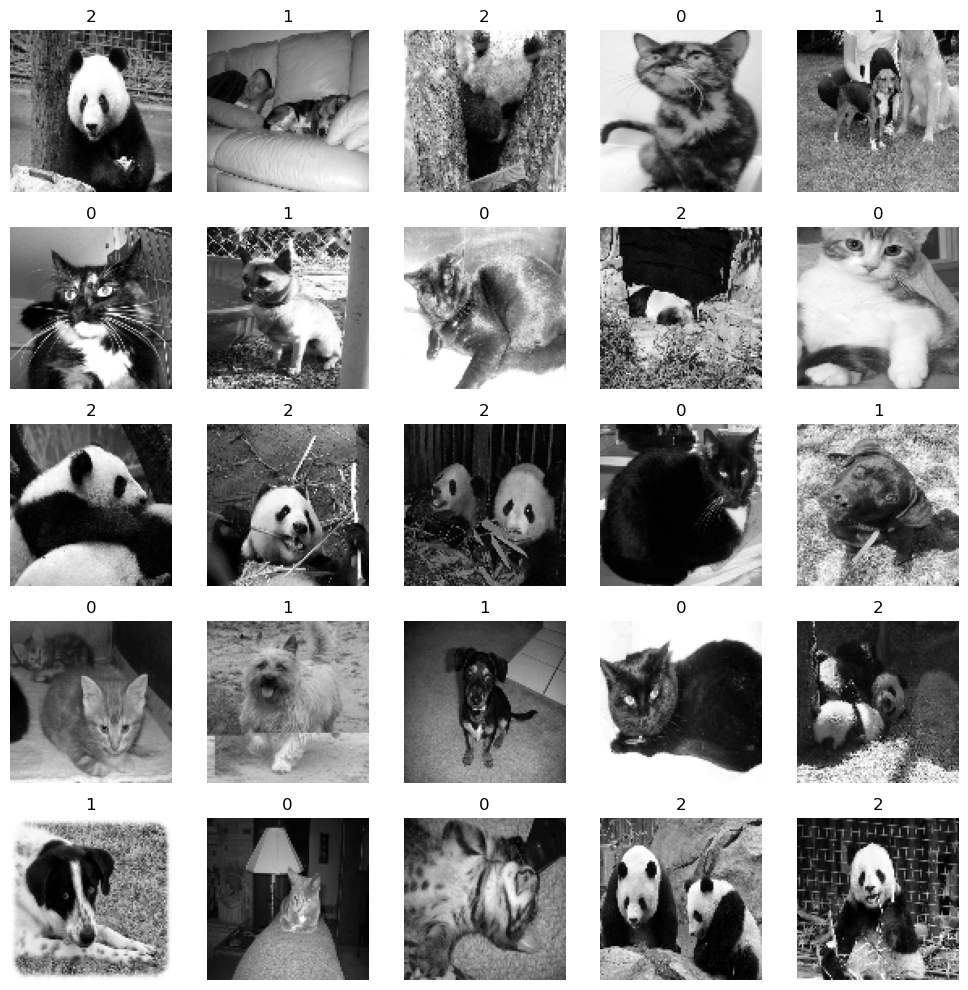

In [53]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  if i < len(train_data):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

The program displays a set of images from the dataset along with their corresponding labels, which represent the animal type: dog, cat, or panda. It uses Matplotlib to create a grid layout where each image is shown in grayscale. The images appear in their original grayscale format, and each one is labeled with a number — 0 for dogs, 1 for cats, and 2 for pandas.
It loops through the train_data list and plots each image in the grid, using ax.set_title(label) to set the title of each image with its label. This way, we can easily see which label is linked to which image. This kind of visualization helps us better understand how the model might recognize and classify the different animals based on their grayscale features.

5 fold cross validation

In [56]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

In [57]:
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold

Fold 1:
Labels: [2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0]
Fold 2:
Labels: [1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0]
Fold 3:
Labels: [2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2]
Fold 4:
Labels: [0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2]
Fold 5:
Labels: [1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0]


In [58]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img  # Calculate element-wise difference
    squared_difference = np.square(difference)  # Square the differences
    summed_squares = np.sum(squared_difference)  # Sum all squared differences
    distance = np.sqrt(summed_squares)  # Take the square root to get Euclidean distance
    return distance

def l1_distance(valid_img, train_img):
    difference = np.abs(valid_img - train_img)  # Calculate element-wise absolute difference
    distance = np.sum(difference)  # Sum all absolute differences to get Manhattan distance
    return distance


In [59]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label


In [60]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 41):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")



K = 1:
  Average Accuracy: 0.39
  Fold Accuracies: [0.43333333333333335, 0.4666666666666667, 0.3333333333333333, 0.36666666666666664, 0.3333333333333333]

K = 2:
  Average Accuracy: 0.39
  Fold Accuracies: [0.43333333333333335, 0.4666666666666667, 0.3333333333333333, 0.36666666666666664, 0.3333333333333333]

K = 3:
  Average Accuracy: 0.45
  Fold Accuracies: [0.48333333333333334, 0.45, 0.4166666666666667, 0.5166666666666667, 0.4]

K = 4:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4666666666666667, 0.5166666666666667, 0.38333333333333336, 0.36666666666666664, 0.3333333333333333]

K = 5:
  Average Accuracy: 0.43
  Fold Accuracies: [0.4166666666666667, 0.4166666666666667, 0.43333333333333335, 0.45, 0.4166666666666667]

K = 6:
  Average Accuracy: 0.45
  Fold Accuracies: [0.4166666666666667, 0.5, 0.36666666666666664, 0.45, 0.5166666666666667]

K = 7:
  Average Accuracy: 0.45
  Fold Accuracies: [0.45, 0.48333333333333334, 0.38333333333333336, 0.5, 0.45]

K = 8:
  Average Accuracy: 0.46


In [61]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 41):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")

K = 1:
  Average Accuracy: 0.34
  Fold Accuracies: [0.35, 0.38333333333333336, 0.36666666666666664, 0.31666666666666665, 0.26666666666666666]
K = 2:
  Average Accuracy: 0.34
  Fold Accuracies: [0.35, 0.38333333333333336, 0.36666666666666664, 0.31666666666666665, 0.26666666666666666]
K = 3:
  Average Accuracy: 0.36
  Fold Accuracies: [0.45, 0.4, 0.4166666666666667, 0.2833333333333333, 0.25]
K = 4:
  Average Accuracy: 0.33
  Fold Accuracies: [0.4, 0.3333333333333333, 0.38333333333333336, 0.31666666666666665, 0.2]
K = 5:
  Average Accuracy: 0.36
  Fold Accuracies: [0.4, 0.35, 0.43333333333333335, 0.3333333333333333, 0.2833333333333333]
K = 6:
  Average Accuracy: 0.36
  Fold Accuracies: [0.4166666666666667, 0.31666666666666665, 0.48333333333333334, 0.36666666666666664, 0.21666666666666667]
K = 7:
  Average Accuracy: 0.40
  Fold Accuracies: [0.43333333333333335, 0.38333333333333336, 0.48333333333333334, 0.35, 0.3333333333333333]
K = 8:
  Average Accuracy: 0.38
  Fold Accuracies: [0.43333333

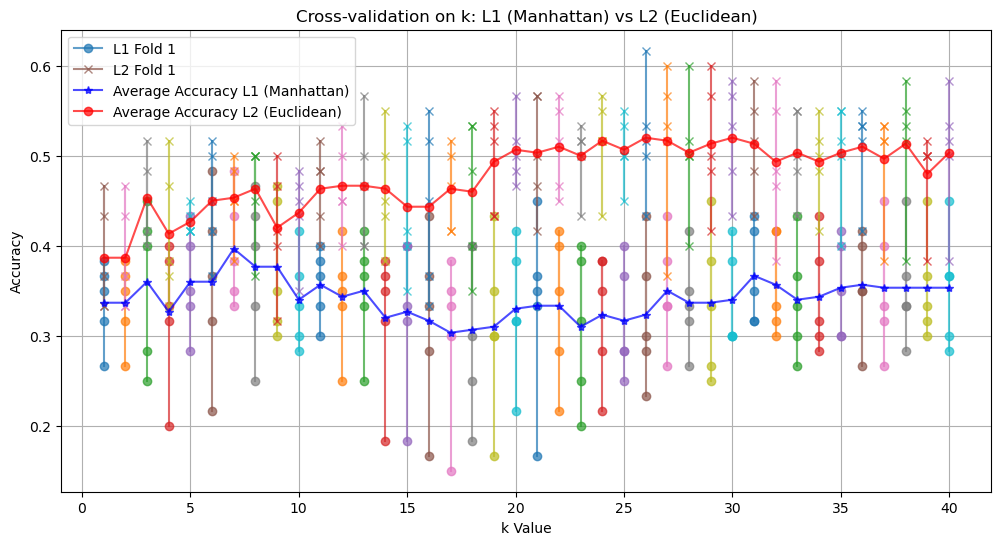

In [62]:
plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(40):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 41), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='*')
plt.plot(range(1, 41), avg_accuracies_2, color='red', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


Varying Performance: The accuracy of both L1 (Manhattan) and L2 (Euclidean) distance metrics fluctuates across different values of k, particularly in the lower range of k (1–15). This reflects both models’ sensitivity to noise and local structure in the data. L1 appears slightly more erratic at very low k, while L2 shows more consistent accuracy gains as k increases.

Optimal k Values: The best performance for both metrics seems to be around k = 20–30, where average accuracies level off and stabilize. In this range, L2 outperforms L1, achieving higher average accuracy. However, both metrics show diminishing returns in accuracy as k exceeds 30.

Model Stability: L2 (Euclidean) shows a smoother and more consistent increase in average accuracy, suggesting a more stable model as k increases. In contrast, L1 exhibits greater fluctuations, especially before k = 20, indicating more sensitivity to the structure of the data and possibly to local anomalies.

Variation Across 5 Folds: L2 generally shows smaller variance across cross-validation folds, especially in the mid-to-high k range, which suggests that it generalizes more consistently across different training/test splits. L1 demonstrates higher fold-to-fold variability, particularly at lower k, hinting at potential instability and overfitting to local patterns.

Selecting the Proper Distance Measure: L2 (Euclidean) is the more robust metric in this case, especially beyond k = 20, offering better and more consistent performance. L1 may be preferable in low-dimensional or sparse feature spaces, but here it shows less stability and lower peak accuracy.

Final Recommendation: L2 (Euclidean) with k in the range of 20–30 for optimal performance and consistency. L1 may be useful in specific scenarios with different data characteristics, but in this instance, L2 offers superior results.


Fold 1 Top 5 Predictions (Euclidean (L2)):


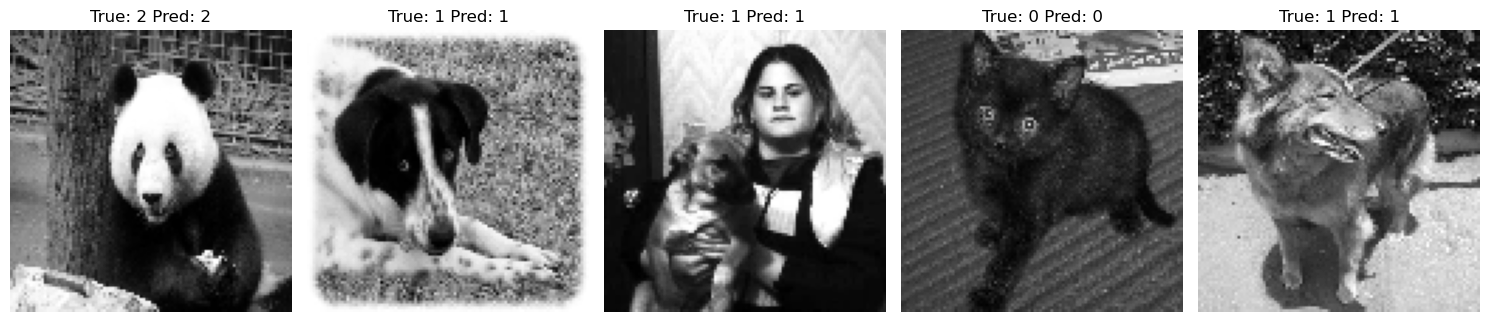


Fold 2 Top 5 Predictions (Euclidean (L2)):


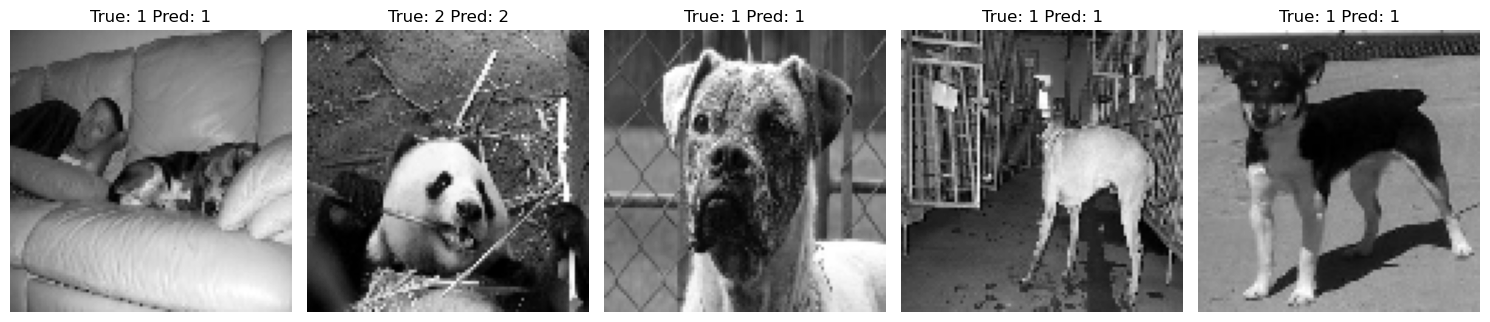


Fold 3 Top 5 Predictions (Euclidean (L2)):


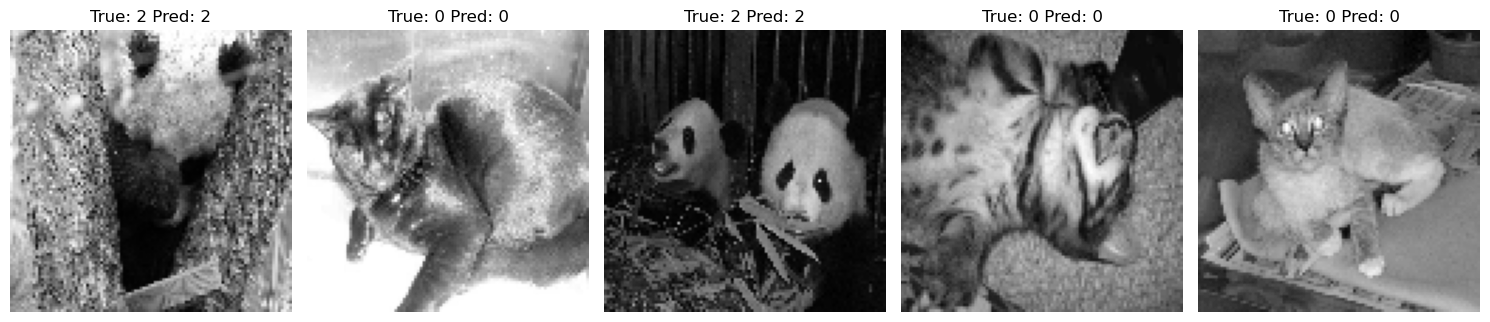


Fold 4 Top 5 Predictions (Euclidean (L2)):


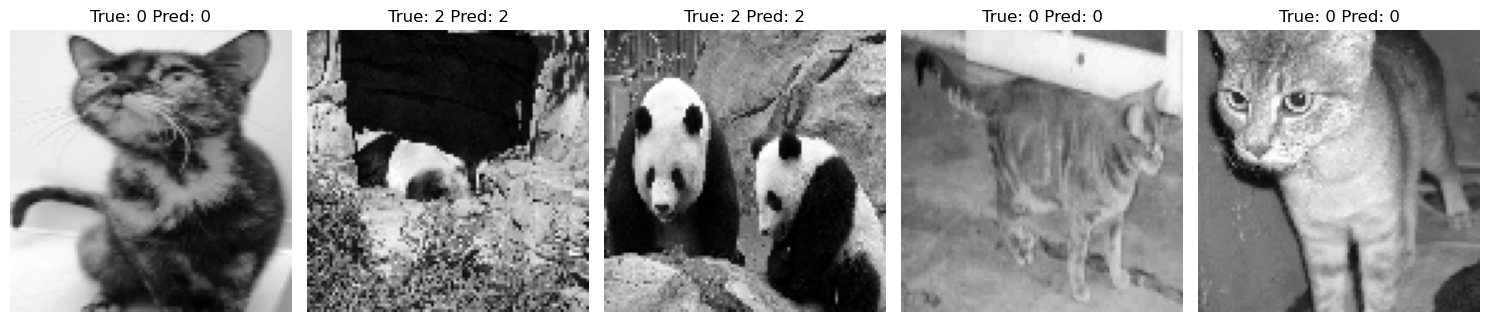


Fold 5 Top 5 Predictions (Euclidean (L2)):


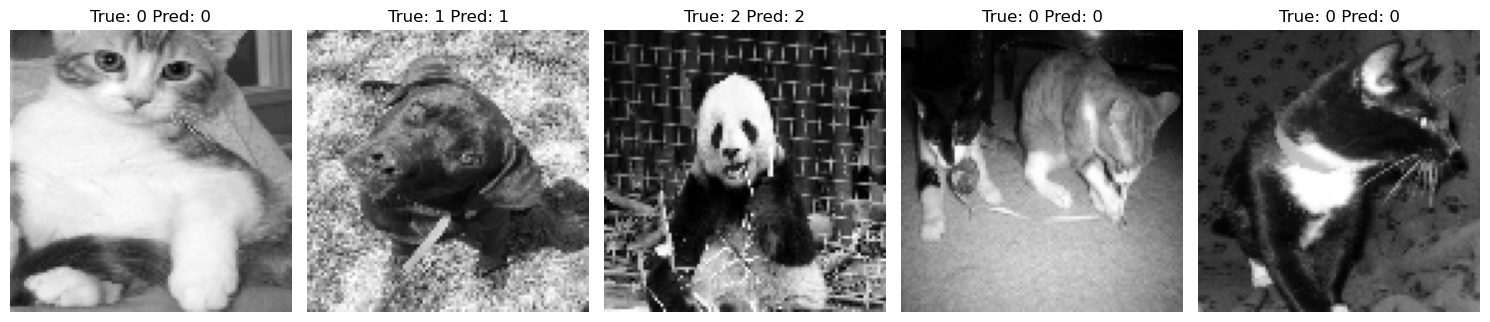


Fold 1 Top 5 Predictions (Manhattan (L1)):


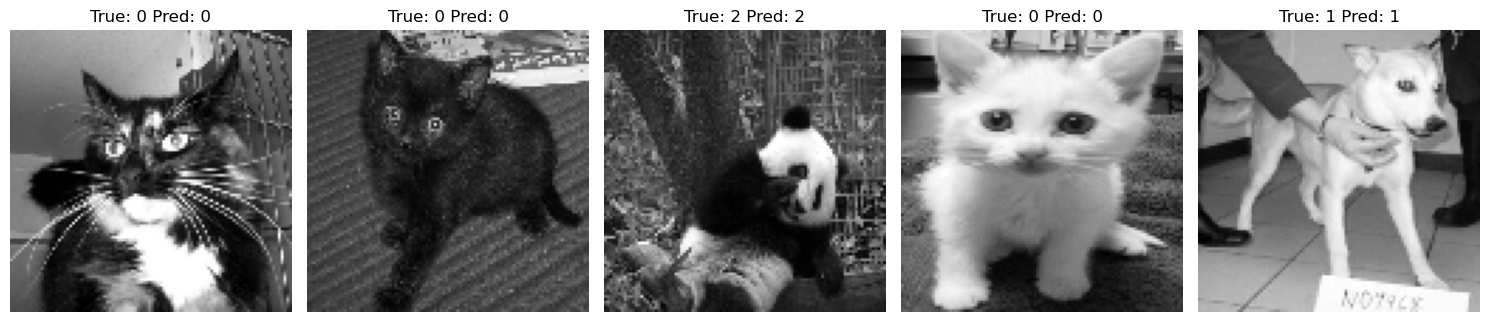


Fold 2 Top 5 Predictions (Manhattan (L1)):


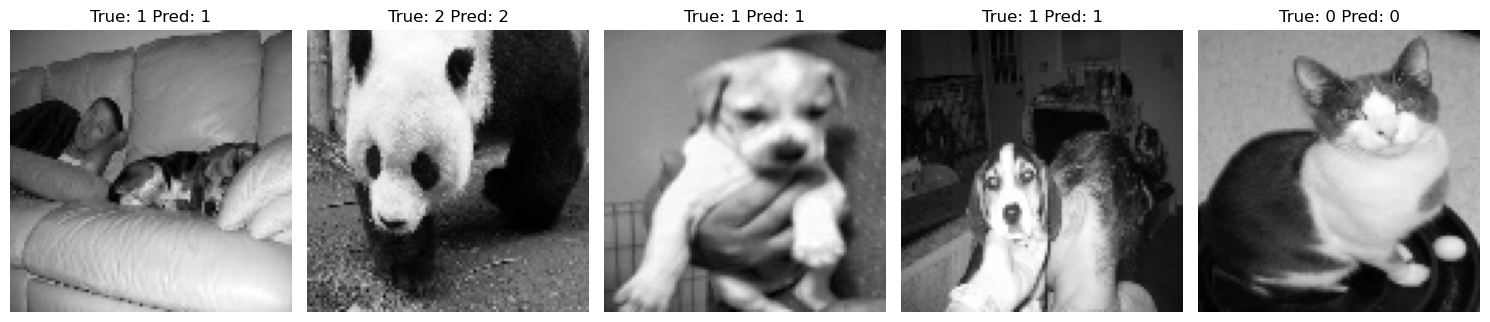


Fold 3 Top 5 Predictions (Manhattan (L1)):


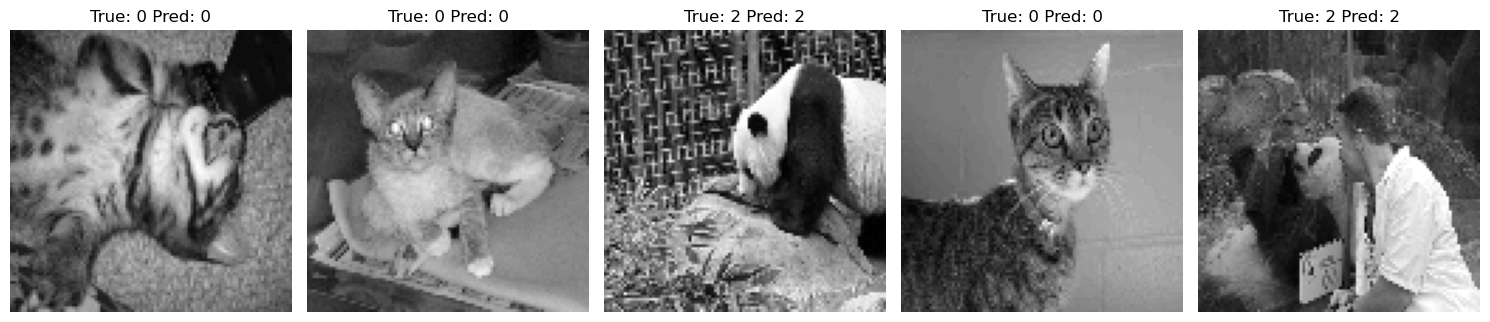


Fold 4 Top 5 Predictions (Manhattan (L1)):


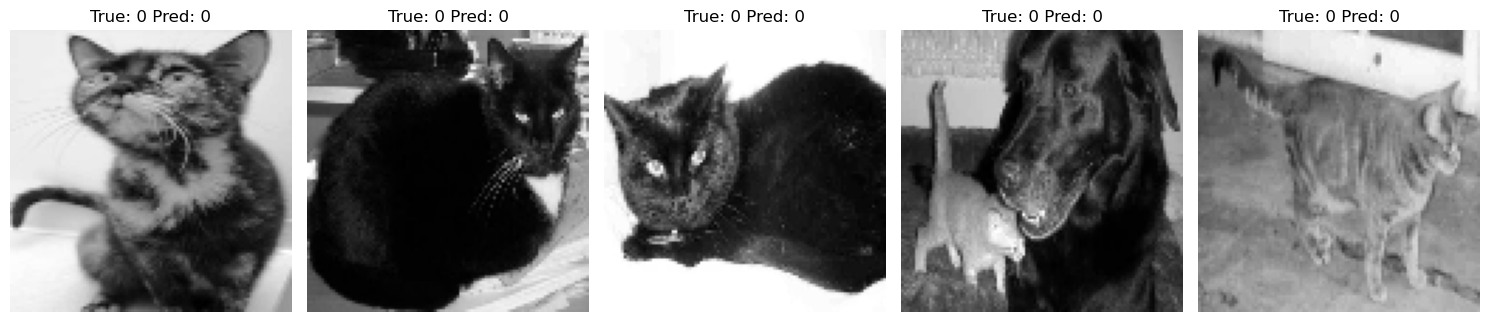


Fold 5 Top 5 Predictions (Manhattan (L1)):


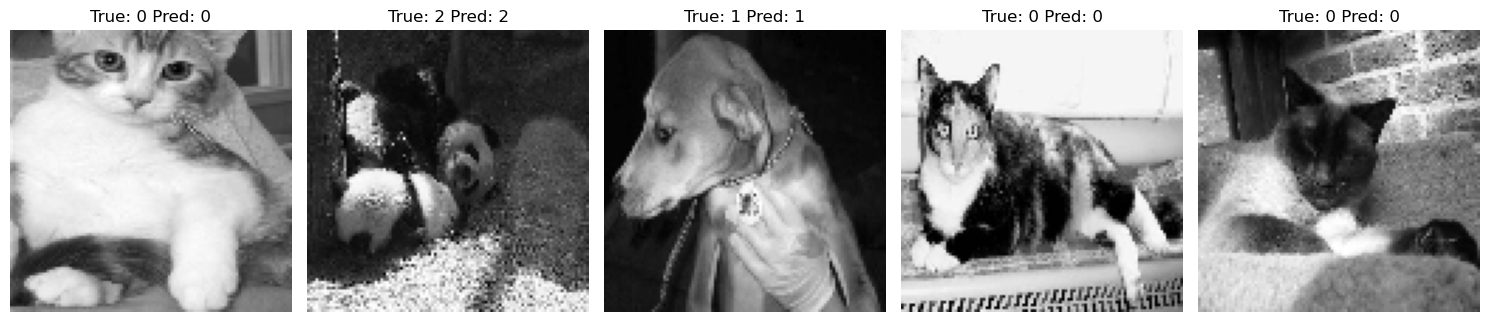

In [64]:
def get_top_5_predictions(folds, distance_function, k=1):
    top_predictions = []  # List to store the top 5 predictions
    for i in range(len(folds)):
        valid_set = folds[i]  # Select the validation set (current fold)
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        for valid_img in valid_set:
            distances = [
                (distance_function(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            distances.sort()  # Sort the distances in ascending order

            predicted_label = knn_prediction(distances, k)
            predictions.append((valid_img[0], valid_img[1], predicted_label))  # Store image, true, and predicted labels

        # Add the top 5 predictions for this fold
        top_predictions.append(sorted(predictions, key=lambda x: x[1] == x[2], reverse=True)[:5])
    return top_predictions


# Function to display the top 5 images for each fold
def show_top_5_images(folds, top_predictions, distance_name, k=1):
    for fold_idx, fold_preds in enumerate(top_predictions, start=1):
        print(f"\nFold {fold_idx} Top 5 Predictions ({distance_name}):")
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Create a plot with 5 subplots

        for idx, (img_data, true_label, pred_label) in enumerate(fold_preds):
            ax = axes[idx]
            # Show the image
            ax.imshow(img_data, cmap='gray')  # Display image in grayscale
            ax.set_title(f'True: {true_label} Pred: {pred_label}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()


# Assume folds is already available and contains your cross-validation data
# Now, we get the top 5 predictions for both Euclidean (L2) and Manhattan (L1)
top_5_euclidean = get_top_5_predictions(folds, l2_distance, k=5)
top_5_manhattan = get_top_5_predictions(folds, l1_distance, k=5)

# Show the top 5 images for both distances
show_top_5_images(folds, top_5_euclidean, "Euclidean (L2)", k=5)
show_top_5_images(folds, top_5_manhattan, "Manhattan (L1)", k=5)

Cross-Validation Procedure:
The dataset is partitioned into multiple subsets, referred to as folds. In each iteration of cross-validation, one fold is designated as the validation set, while the remaining folds are used to train the model.
For each sample in the validation set, distances are computed to all samples in the training set using either the Euclidean (L2) or Manhattan (L1) distance metric. The distances are then sorted in ascending order, and the k nearest neighbors are selected.

Top 5 Prediction Analysis:
Model performance is evaluated by comparing predicted labels against actual labels within each validation fold. The number of correct predictions is recorded for each image.
Images that are consistently classified correctly across folds are identified, and the top five with the highest number of correct classifications are selected as the most reliably predicted samples.